In [1]:
import pde
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import scipy
import torch
import h5py
import xarray as xr
import multiprocessing as mp
from ks import get_sim

# 1d Kuramoto-Sivashinksky PDE

In [2]:
L = 128
n_sim = 10
n_steps = [i*10+1 for i in range(15)]
# make 1D grid
grid = pde.CartesianGrid([(0, 50)], [L], periodic=True)



In [3]:
pool = mp.Pool(mp.cpu_count()-2)
results = []


result_objects = [pool.apply_async(get_sim, args = (grid, n_steps, 1)) for i in range(2)]
results = [r.get()[1] for r in result_objects]

pool.close()
pool.join()

result_array = np.array(results)

In [4]:
result_array.shape

(2, 128)

In [5]:
L = 128
n_sim = 3
n_steps = [i*10+1 for i in range(15)]
# make 1D grid
grid = pde.CartesianGrid([(0, 50)], [L], periodic=True)

# define Kuramoto-Sivashinksky PDE
eq = pde.PDE({"u": "-u * d_dx(u) / 2 - laplace(u + laplace(u))"})

res = np.zeros((n_sim, len(n_steps), L))

for n in range(n_sim):
    # solve the system
    storage = pde.MemoryStorage()
    # initial condition: random field
    state = pde.ScalarField.random_uniform(grid, vmin=-1, vmax=1)
    result = eq.solve(
    state,
    t_range=150,
    dt=0.001,
    adaptive=True,
    tracker=[storage.tracker(n_steps)],
    )
    res[n] = np.array(storage.data)

np.save("data/ks_1d_data.npy", res)

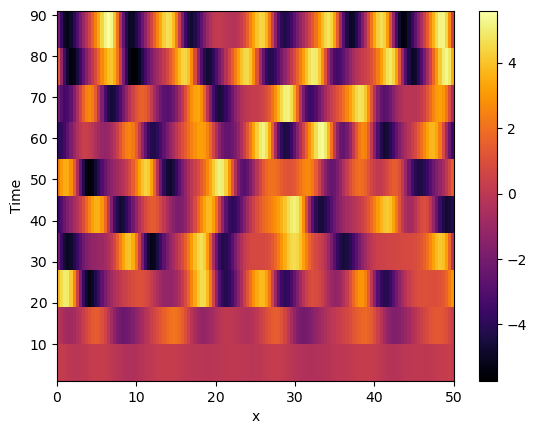

In [6]:
# plot the time evolution of the system
pde.plot_kymograph(storage, cmap = "inferno")

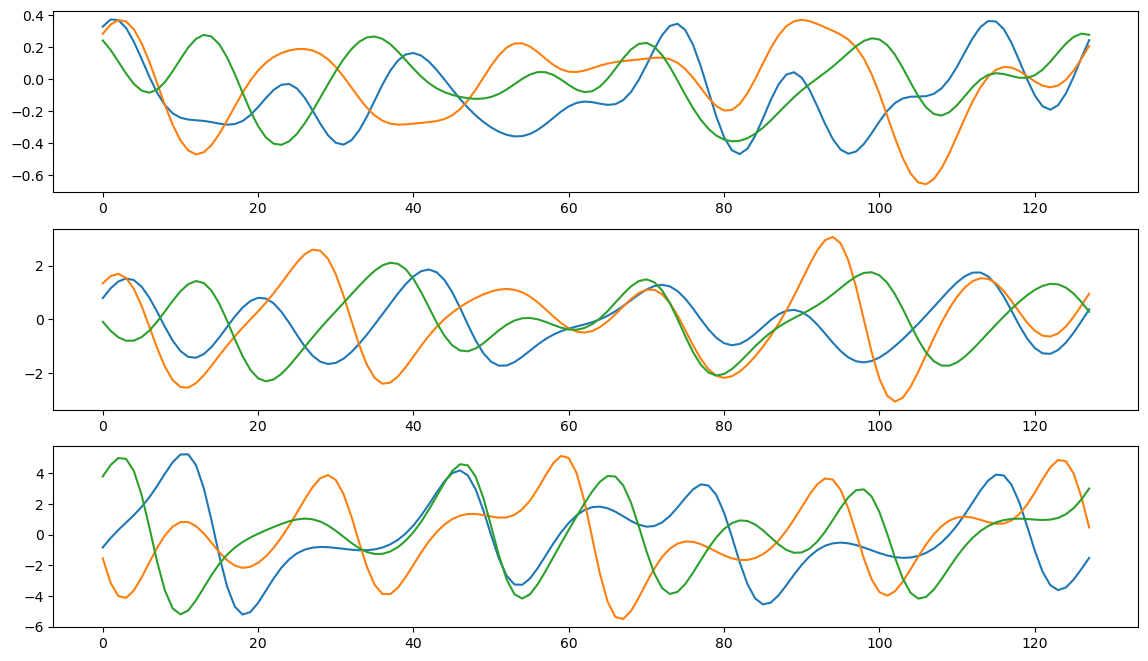

In [16]:
# Plot random time slices
n_plot = np.random.randint(0,n_sim,3)

fig, axs = plt.subplots(3,1, figsize=(14, 8))
for i, x in enumerate(n_plot):
    axs[0].plot(res[i, 0], label=f"t={1*10}h")
    axs[1].plot(res[i, 1], label=f"t={10*10}h")
    axs[2].plot(res[i, 2], label=f"t={50*10}h")

# 2d Kuramoto-Sivashinksky PDE

In [19]:
L = 64
n_steps = [i*5+1 for i in range(15)]
n_sim = 2

grid = pde.CartesianGrid([(0, 50), (0, 50)], [L,L], periodic = True)
eq = pde.PDE({"u": "-gradient_squared(u) / 2 - laplace(u + laplace(u))"})  # define the pde

state = pde.ScalarField.random_uniform(grid, vmin = -1, vmax = 1)  # generate initial condition


# solve the system
storage = pde.MemoryStorage()
result = eq.solve(
state,
t_range=150,
dt=0.001,
adaptive=True,
tracker=[storage.tracker(n_steps)],
)


In [20]:
results = np.array(storage.data)

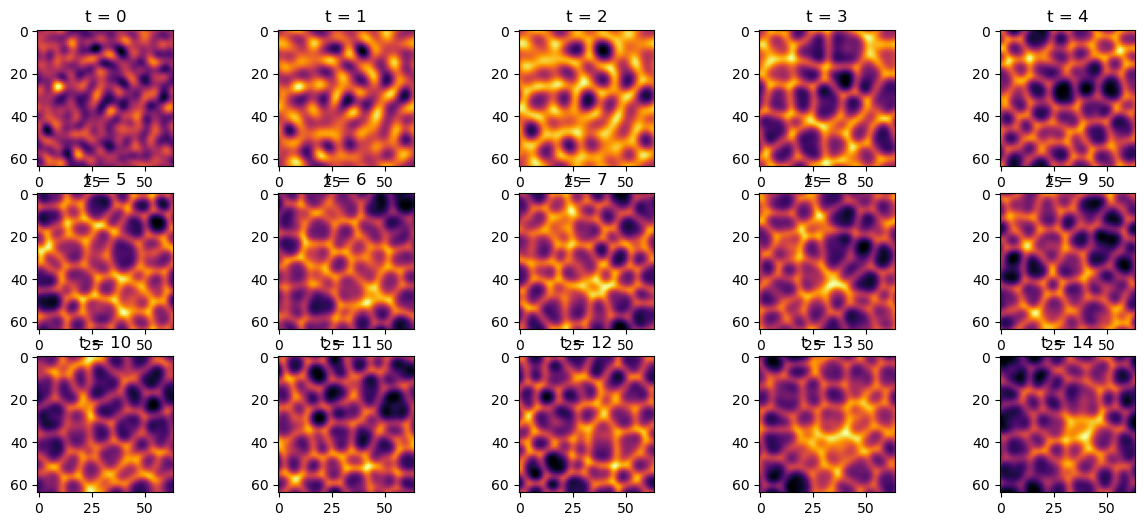

In [21]:
fig, axs = plt.subplots(3,5, figsize = (15,6))
axs= axs.ravel()

for i in range(results.shape[0]):
    axs[i].imshow(results[i], cmap = "inferno")
    axs[i].set_title("t = " + str(i))

In [22]:
import multiprocessing as mp

In [5]:
L = 64
n_steps = [i*5+1 for i in range(15)]
n_sim = 2

grid = pde.CartesianGrid([(0, 50), (0, 50)], [L,L], periodic = True)
eq = pde.PDE({"u": "-gradient_squared(u) / 2 - laplace(u + laplace(u))"})  # define the pde

state = pde.ScalarField.random_uniform(grid, vmin = -1, vmax = 1)  # generate initial condition


In [6]:
pool = mp.Pool(mp.cpu_count()-2)
results = []


result_objects = [pool.apply_async(get_sim, args = (grid,  n_steps, 2)) for i in range(2)]
results = [r.get()[1] for r in result_objects]

pool.close()
pool.join()

result_array = np.array(results)

In [7]:
result_array.shape

(2, 64, 64)